### Setting the CheXpert dataset labels to "U-Zeroes" mode; setting all "uncertain" labels to zeroes
This notebook does the following:

* Keeping only the relevant columns with reordering the CheXpert competition labels to be the first five label columns
* Splitting the official training set into a train and validation set with the official valid set being the "test" set
* Creating csv label files of all 14 labels and csv label files of only the 5 CheXpert competition labels.

__Reference__: The 'Leveraging Uncertainty Labels' section in the official CheXpert website: [link](https://stanfordmlgroup.github.io/competitions/chexpert/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 1- Reading train and validation labels csv files

In [2]:
train_full_df = pd.read_csv("../../labels/train.csv")

In [3]:
train_full_df.columns

Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices'],
      dtype='object')

In [4]:
train_full_df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0/train/patient00001/study1/view1_...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0/train/patient00002/study2/view1_...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0/train/patient00002/study1/view1_...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0/train/patient00002/study1/view2_...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0/train/patient00003/study1/view1_...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223409,CheXpert-v1.0/train/patient64537/study2/view1_...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,0.0,1.0,NaN,NaN,NaN
223410,CheXpert-v1.0/train/patient64537/study1/view1_...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,0.0,-1.0,NaN,-1.0,NaN,NaN,NaN
223411,CheXpert-v1.0/train/patient64538/study1/view1_...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223412,CheXpert-v1.0/train/patient64539/study1/view1_...,Female,0,Frontal,AP,NaN,NaN,1.0,1.0,NaN,NaN,NaN,-1.0,1.0,0.0,NaN,NaN,NaN,0.0


In [5]:
test_df = pd.read_csv("../../labels/valid.csv")

In [6]:
test_df.columns

Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices'],
      dtype='object')

In [7]:
test_df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0/valid/patient64541/study1/view1_...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0/valid/patient64542/study1/view1_...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0/valid/patient64542/study1/view2_...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0/valid/patient64543/study1/view1_...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0/valid/patient64544/study1/view1_...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,CheXpert-v1.0/valid/patient64736/study1/view1_...,Female,57,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
230,CheXpert-v1.0/valid/patient64737/study1/view1_...,Male,65,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
231,CheXpert-v1.0/valid/patient64738/study1/view1_...,Male,71,Frontal,AP,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
232,CheXpert-v1.0/valid/patient64739/study1/view1_...,Female,45,Frontal,AP,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2- Replacing Paths with '.jpg' with '.png' for use in the resized 512x512 dataset

In [8]:
train_full_df['Path'] = train_full_df['Path'].str.replace(".jpg", ".png")

/home/tamer/anaconda3/envs/chexpert/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [9]:
train_full_df["Path"][0]

'CheXpert-v1.0/train/patient00001/study1/view1_frontal.png'

In [10]:
test_df['Path'] = test_df['Path'].str.replace(".jpg", ".png")

/home/tamer/anaconda3/envs/chexpert/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [11]:
test_df["Path"][0]

'CheXpert-v1.0/valid/patient64541/study1/view1_frontal.png'

### 3- Further splitting the CheXpert training set into an 80/20 train/validation set with keeping the official validation set as the "test" set

In [12]:
train_df, validation_df = train_test_split(
    train_full_df,
    test_size=0.2,
    random_state=420,
    shuffle=True
)

In [13]:
train_df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
147955,CheXpert-v1.0/train/patient35203/study28/view1...,Male,66,Frontal,AP,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,1.0
163338,CheXpert-v1.0/train/patient38124/study5/view1_...,Male,59,Frontal,AP,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN,1.0,1.0
69480,CheXpert-v1.0/train/patient16628/study1/view2_...,Male,27,Frontal,PA,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,1.0,NaN
25205,CheXpert-v1.0/train/patient06161/study2/view1_...,Male,61,Frontal,AP,NaN,NaN,1.0,1.0,NaN,NaN,0.0,NaN,-1.0,0.0,0.0,NaN,NaN,NaN
98537,CheXpert-v1.0/train/patient23744/study17/view2...,Female,62,Lateral,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62239,CheXpert-v1.0/train/patient15019/study1/view1_...,Female,85,Frontal,PA,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN
152127,CheXpert-v1.0/train/patient35905/study3/view1_...,Female,45,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
119174,CheXpert-v1.0/train/patient28559/study1/view3_...,Female,57,Lateral,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193608,CheXpert-v1.0/train/patient46927/study1/view1_...,Male,46,Frontal,AP,NaN,NaN,NaN,0.0,NaN,1.0,NaN,1.0,NaN,0.0,0.0,NaN,NaN,1.0


In [14]:
validation_df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
67305,CheXpert-v1.0/train/patient16169/study2/view2_...,Male,62,Frontal,AP,NaN,NaN,-1.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0
158250,CheXpert-v1.0/train/patient37045/study7/view1_...,Female,69,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
51315,CheXpert-v1.0/train/patient12490/study12/view1...,Male,51,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0
204270,CheXpert-v1.0/train/patient51556/study7/view1_...,Female,68,Frontal,AP,NaN,NaN,NaN,1.0,NaN,-1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
71280,CheXpert-v1.0/train/patient17091/study1/view1_...,Male,32,Frontal,PA,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84611,CheXpert-v1.0/train/patient20333/study4/view1_...,Male,58,Frontal,AP,NaN,1.0,NaN,NaN,NaN,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN,NaN,1.0
168690,CheXpert-v1.0/train/patient39344/study11/view1...,Female,67,Frontal,AP,NaN,NaN,NaN,1.0,NaN,-1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
166829,CheXpert-v1.0/train/patient38931/study1/view1_...,Female,83,Frontal,AP,NaN,1.0,1.0,1.0,NaN,NaN,NaN,-1.0,NaN,NaN,1.0,NaN,NaN,NaN
184236,CheXpert-v1.0/train/patient43600/study1/view1_...,Male,82,Frontal,AP,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0


### 4- Checking how many Front and Lateral pictures exist for all train/validation/test splits

#### 4.1 Train set

In [15]:
count_frontal_train = train_df["Frontal/Lateral"].str.contains("Frontal", na=False).sum()
count_frontal_train

152672

In [16]:
frontal_train_ratio = count_frontal_train / len(train_df)
frontal_train_ratio

0.8541998869809938

In [17]:
count_lateral_train = train_df["Frontal/Lateral"].str.contains("Lateral", na=False).sum()
count_lateral_train

26059

In [18]:
lateral_train_ratio = count_lateral_train / len(train_df)
lateral_train_ratio

0.14580011301900622

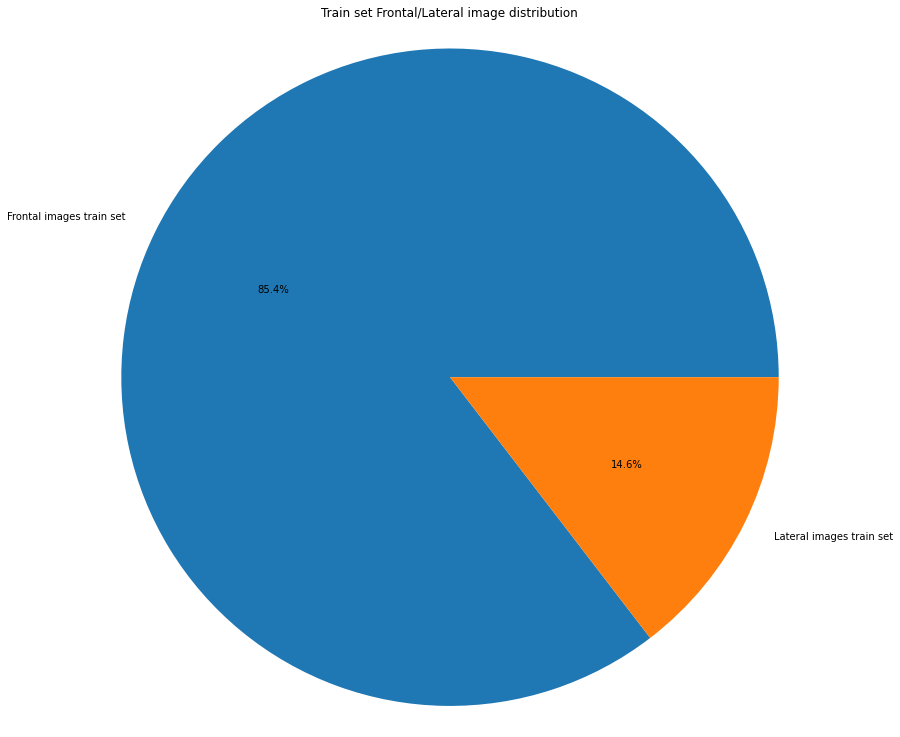

In [19]:
sizes = [frontal_train_ratio, lateral_train_ratio]
labels = ["Frontal images train set", "Lateral images train set"]

fig1, ax1 = plt.subplots(figsize=(13, 13))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Train set Frontal/Lateral image distribution")

plt.show()

#### 4.2 Validation set

In [20]:
count_frontal_validation = validation_df["Frontal/Lateral"].str.contains("Frontal", na=False).sum()
count_frontal_validation

38355

In [21]:
frontal_validation_ratio = count_frontal_validation / len(validation_df)
frontal_validation_ratio

0.858380144573999

In [22]:
count_lateral_validation = validation_df["Frontal/Lateral"].str.contains("Lateral", na=False).sum()
count_lateral_validation

6328

In [23]:
lateral_validation_ratio = count_lateral_validation / len(validation_df)
lateral_validation_ratio

0.14161985542600095

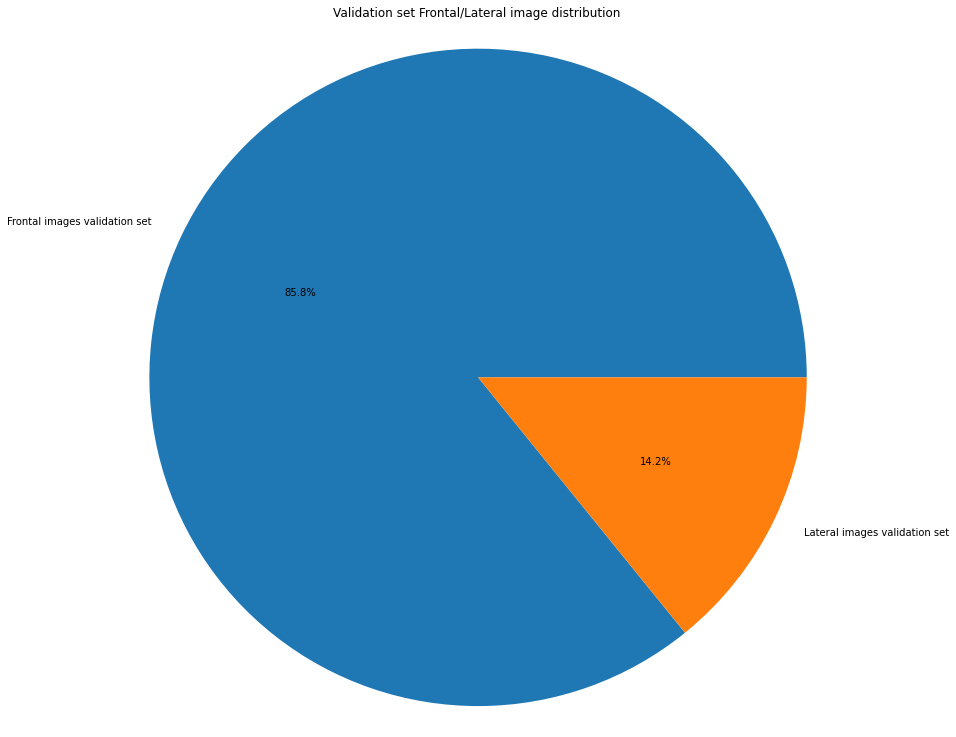

In [24]:
sizes = [frontal_validation_ratio, lateral_validation_ratio]
labels = ["Frontal images validation set", "Lateral images validation set"]

fig1, ax1 = plt.subplots(figsize=(13, 13))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Validation set Frontal/Lateral image distribution")

plt.show()

#### 4.3 Test set

In [25]:
count_frontal_test = test_df["Frontal/Lateral"].str.contains("Frontal", na=False).sum()
count_frontal_test

202

In [26]:
frontal_test_ratio = count_frontal_test / len(test_df)
frontal_test_ratio

0.8632478632478633

In [27]:
count_lateral_test = test_df["Frontal/Lateral"].str.contains("Lateral", na=False).sum()
count_lateral_test

32

In [28]:
lateral_test_ratio = count_lateral_test / len(test_df)
lateral_test_ratio

0.13675213675213677

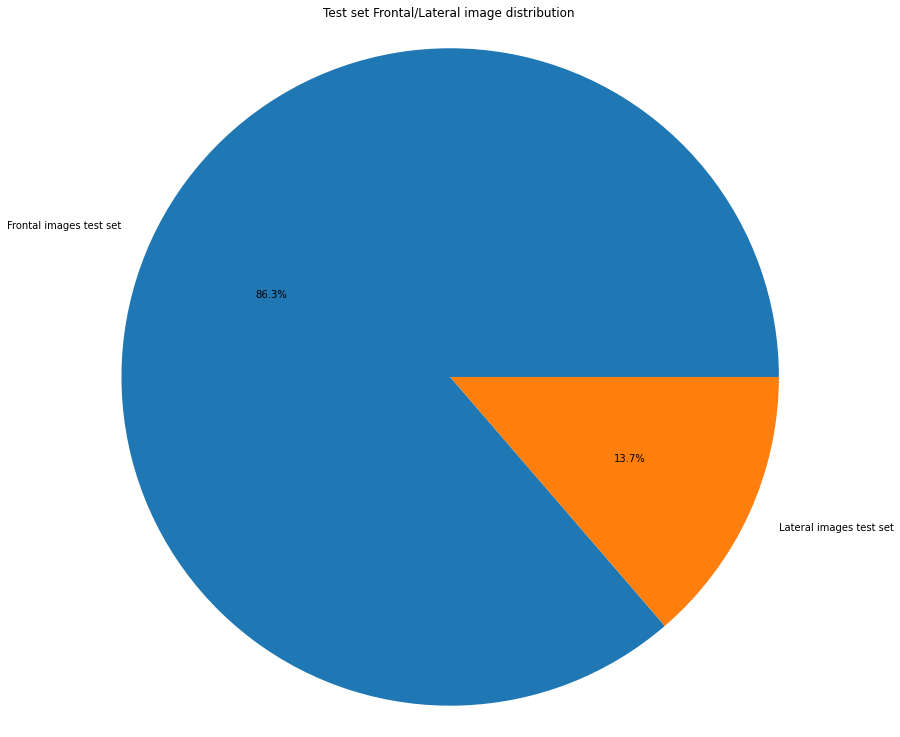

In [29]:
sizes = [frontal_test_ratio, lateral_test_ratio]
labels = ["Frontal images test set", "Lateral images test set"]

fig1, ax1 = plt.subplots(figsize=(13, 13))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Test set Frontal/Lateral image distribution")

plt.show()

### 5- Replacing NaNs with zeroes, and replacing the 'undecided (-1) labels with zeroes' for u-zeroes approach

In [30]:
train_df = train_df.fillna(0)
validation_df = validation_df.fillna(0)
test_df = test_df.fillna(0)

In [31]:
train_df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
147955,CheXpert-v1.0/train/patient35203/study28/view1...,Male,66,Frontal,AP,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
163338,CheXpert-v1.0/train/patient38124/study5/view1_...,Male,59,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,1.0,0.0,1.0,1.0
69480,CheXpert-v1.0/train/patient16628/study1/view2_...,Male,27,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25205,CheXpert-v1.0/train/patient06161/study2/view1_...,Male,61,Frontal,AP,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
98537,CheXpert-v1.0/train/patient23744/study17/view2...,Female,62,Lateral,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62239,CheXpert-v1.0/train/patient15019/study1/view1_...,Female,85,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152127,CheXpert-v1.0/train/patient35905/study3/view1_...,Female,45,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
119174,CheXpert-v1.0/train/patient28559/study1/view3_...,Female,57,Lateral,0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193608,CheXpert-v1.0/train/patient46927/study1/view1_...,Male,46,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
validation_df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
67305,CheXpert-v1.0/train/patient16169/study2/view2_...,Male,62,Frontal,AP,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
158250,CheXpert-v1.0/train/patient37045/study7/view1_...,Female,69,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
51315,CheXpert-v1.0/train/patient12490/study12/view1...,Male,51,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
204270,CheXpert-v1.0/train/patient51556/study7/view1_...,Female,68,Frontal,AP,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
71280,CheXpert-v1.0/train/patient17091/study1/view1_...,Male,32,Frontal,PA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84611,CheXpert-v1.0/train/patient20333/study4/view1_...,Male,58,Frontal,AP,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,1.0,0.0,0.0,1.0
168690,CheXpert-v1.0/train/patient39344/study11/view1...,Female,67,Frontal,AP,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
166829,CheXpert-v1.0/train/patient38931/study1/view1_...,Female,83,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0
184236,CheXpert-v1.0/train/patient43600/study1/view1_...,Male,82,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [33]:
test_df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0/valid/patient64541/study1/view1_...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0/valid/patient64542/study1/view1_...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0/valid/patient64542/study1/view2_...,Male,70,Lateral,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0/valid/patient64543/study1/view1_...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0/valid/patient64544/study1/view1_...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,CheXpert-v1.0/valid/patient64736/study1/view1_...,Female,57,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
230,CheXpert-v1.0/valid/patient64737/study1/view1_...,Male,65,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
231,CheXpert-v1.0/valid/patient64738/study1/view1_...,Male,71,Frontal,AP,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
232,CheXpert-v1.0/valid/patient64739/study1/view1_...,Female,45,Frontal,AP,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
train_df = train_df.replace(-1, 0)

In [35]:
train_df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
147955,CheXpert-v1.0/train/patient35203/study28/view1...,Male,66,Frontal,AP,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
163338,CheXpert-v1.0/train/patient38124/study5/view1_...,Male,59,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
69480,CheXpert-v1.0/train/patient16628/study1/view2_...,Male,27,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25205,CheXpert-v1.0/train/patient06161/study2/view1_...,Male,61,Frontal,AP,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98537,CheXpert-v1.0/train/patient23744/study17/view2...,Female,62,Lateral,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62239,CheXpert-v1.0/train/patient15019/study1/view1_...,Female,85,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152127,CheXpert-v1.0/train/patient35905/study3/view1_...,Female,45,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
119174,CheXpert-v1.0/train/patient28559/study1/view3_...,Female,57,Lateral,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193608,CheXpert-v1.0/train/patient46927/study1/view1_...,Male,46,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
validation_df = validation_df.replace(-1, 0)

In [37]:
validation_df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
67305,CheXpert-v1.0/train/patient16169/study2/view2_...,Male,62,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
158250,CheXpert-v1.0/train/patient37045/study7/view1_...,Female,69,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
51315,CheXpert-v1.0/train/patient12490/study12/view1...,Male,51,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
204270,CheXpert-v1.0/train/patient51556/study7/view1_...,Female,68,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
71280,CheXpert-v1.0/train/patient17091/study1/view1_...,Male,32,Frontal,PA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84611,CheXpert-v1.0/train/patient20333/study4/view1_...,Male,58,Frontal,AP,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
168690,CheXpert-v1.0/train/patient39344/study11/view1...,Female,67,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
166829,CheXpert-v1.0/train/patient38931/study1/view1_...,Female,83,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
184236,CheXpert-v1.0/train/patient43600/study1/view1_...,Male,82,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [38]:
test_df = test_df.replace(-1, 0)

In [39]:
test_df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0/valid/patient64541/study1/view1_...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0/valid/patient64542/study1/view1_...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0/valid/patient64542/study1/view2_...,Male,70,Lateral,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0/valid/patient64543/study1/view1_...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0/valid/patient64544/study1/view1_...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,CheXpert-v1.0/valid/patient64736/study1/view1_...,Female,57,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
230,CheXpert-v1.0/valid/patient64737/study1/view1_...,Male,65,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
231,CheXpert-v1.0/valid/patient64738/study1/view1_...,Male,71,Frontal,AP,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
232,CheXpert-v1.0/valid/patient64739/study1/view1_...,Female,45,Frontal,AP,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 6- Reordering the columns so that the CheXpert competition labels: (Atelectasis, Cardiomegaly, Consolidation, Edema, Pleural Effusion) would be the first five label columns (for easier extraction of relevant model outputs) and removing irrelevant columns

In [40]:
reordered_columns = [
    "Path",
    "Atelectasis",
    "Cardiomegaly",
    "Consolidation",
    "Edema",
    "Pleural Effusion",
    "Pleural Other",
    "Pneumonia",
    "Pneumothorax",
    "Enlarged Cardiomediastinum",
    "Lung Opacity",
    "Lung Lesion",
    "Fracture",
    "Support Devices",
    "No Finding"
]

In [41]:
train_df = train_df[reordered_columns]

In [42]:
train_df

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Enlarged Cardiomediastinum,Lung Opacity,Lung Lesion,Fracture,Support Devices,No Finding
147955,CheXpert-v1.0/train/patient35203/study28/view1...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
163338,CheXpert-v1.0/train/patient38124/study5/view1_...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
69480,CheXpert-v1.0/train/patient16628/study1/view2_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25205,CheXpert-v1.0/train/patient06161/study2/view1_...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
98537,CheXpert-v1.0/train/patient23744/study17/view2...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62239,CheXpert-v1.0/train/patient15019/study1/view1_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152127,CheXpert-v1.0/train/patient35905/study3/view1_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
119174,CheXpert-v1.0/train/patient28559/study1/view3_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193608,CheXpert-v1.0/train/patient46927/study1/view1_...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
validation_df = validation_df[reordered_columns]

In [44]:
validation_df

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Enlarged Cardiomediastinum,Lung Opacity,Lung Lesion,Fracture,Support Devices,No Finding
67305,CheXpert-v1.0/train/patient16169/study2/view2_...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
158250,CheXpert-v1.0/train/patient37045/study7/view1_...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
51315,CheXpert-v1.0/train/patient12490/study12/view1...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
204270,CheXpert-v1.0/train/patient51556/study7/view1_...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
71280,CheXpert-v1.0/train/patient17091/study1/view1_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84611,CheXpert-v1.0/train/patient20333/study4/view1_...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
168690,CheXpert-v1.0/train/patient39344/study11/view1...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
166829,CheXpert-v1.0/train/patient38931/study1/view1_...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
184236,CheXpert-v1.0/train/patient43600/study1/view1_...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
test_df = test_df[reordered_columns]

In [46]:
test_df

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Enlarged Cardiomediastinum,Lung Opacity,Lung Lesion,Fracture,Support Devices,No Finding
0,CheXpert-v1.0/valid/patient64541/study1/view1_...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0/valid/patient64542/study1/view1_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,CheXpert-v1.0/valid/patient64542/study1/view2_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,CheXpert-v1.0/valid/patient64543/study1/view1_...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0/valid/patient64544/study1/view1_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,CheXpert-v1.0/valid/patient64736/study1/view1_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
230,CheXpert-v1.0/valid/patient64737/study1/view1_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
231,CheXpert-v1.0/valid/patient64738/study1/view1_...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
232,CheXpert-v1.0/valid/patient64739/study1/view1_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### 7- Checking distribution of labels

#### 7.1 Atelectasis

In [47]:
train_df["Atelectasis"].sum()

26795.0

In [48]:
train_df_Atelectasis_ratio = train_df["Atelectasis"].sum() / len(train_df)
train_df_Atelectasis_ratio

0.14991803324549183

In [49]:
validation_df["Atelectasis"].sum()

6581.0

In [50]:
validation_df_Atelectasis_ratio = validation_df["Atelectasis"].sum() / len(validation_df)
validation_df_Atelectasis_ratio

0.14728196405791913

In [51]:
test_df["Atelectasis"].sum()

80.0

In [52]:
test_df_Atelectasis_ratio = test_df["Atelectasis"].sum() / len(test_df)
test_df_Atelectasis_ratio

0.3418803418803419

#### 7.2 Cardiomegaly

In [53]:
train_df["Cardiomegaly"].sum()

21671.0

In [54]:
train_df_Cardiomegaly_ratio = train_df["Cardiomegaly"].sum() / len(train_df)
train_df_Cardiomegaly_ratio

0.12124925166870884

In [55]:
validation_df["Cardiomegaly"].sum()

5329.0

In [56]:
validation_df_Cardiomegaly_ratio = validation_df["Cardiomegaly"].sum() / len(validation_df)
validation_df_Cardiomegaly_ratio

0.11926235928652955

In [57]:
test_df["Cardiomegaly"].sum()

68.0

In [58]:
test_df_Cardiomegaly_ratio = test_df["Cardiomegaly"].sum() / len(test_df)
test_df_Cardiomegaly_ratio

0.2905982905982906

#### 7.3 Consolidation

In [59]:
train_df["Consolidation"].sum()

11825.0

In [60]:
train_df_Consolidation_ratio = train_df["Consolidation"].sum() / len(train_df)
train_df_Consolidation_ratio

0.06616087863884833

In [61]:
validation_df["Consolidation"].sum()

2958.0

In [62]:
validation_df_Consolidation_ratio = validation_df["Consolidation"].sum() / len(validation_df)
validation_df_Consolidation_ratio

0.06619967325381017

In [63]:
test_df["Consolidation"].sum()

33.0

In [64]:
test_df_Consolidation_ratio = test_df["Consolidation"].sum() / len(test_df)
test_df_Consolidation_ratio

0.14102564102564102

#### 7.4 Edema 

In [65]:
train_df["Edema"].sum()

41987.0

In [66]:
train_df_Edema_ratio = train_df["Edema"].sum() / len(train_df)
train_df_Edema_ratio

0.23491727792045028

In [67]:
validation_df["Edema"].sum()

10259.0

In [68]:
validation_df_Edema_ratio = validation_df["Edema"].sum() / len(validation_df)
validation_df_Edema_ratio

0.22959514804287984

In [69]:
test_df["Edema"].sum()

45.0

In [70]:
test_df_Edema_ratio = test_df["Edema"].sum() / len(test_df)
test_df_Edema_ratio

0.19230769230769232

#### 7.5 Pleural Effusion

In [71]:
train_df["Pleural Effusion"].sum()

68928.0

In [72]:
train_df_Pleural_Effusion_ratio = train_df["Pleural Effusion"].sum() / len(train_df)
train_df_Pleural_Effusion_ratio

0.38565218121086997

In [73]:
validation_df["Pleural Effusion"].sum()

17259.0

In [74]:
validation_df_Pleural_Effusion_ratio = validation_df["Pleural Effusion"].sum() / len(validation_df)
validation_df_Pleural_Effusion_ratio

0.386254280151288

In [75]:
test_df["Pleural Effusion"].sum()

67.0

In [76]:
test_df_Pleural_Effusion_ratio = test_df["Pleural Effusion"].sum() / len(test_df)
test_df_Pleural_Effusion_ratio

0.2863247863247863

#### 7.6 Pleural Other

In [77]:
train_df["Pleural Other"].sum()

2801.0

In [78]:
train_df_Pleural_Other_ratio = train_df["Pleural Other"].sum() / len(train_df)
train_df_Pleural_Other_ratio

0.01567159586193777

In [79]:
validation_df["Pleural Other"].sum()

722.0

In [80]:
validation_df_Pleural_Other_ratio = validation_df["Pleural Other"].sum() / len(validation_df)
validation_df_Pleural_Other_ratio

0.01615827048318152

In [81]:
test_df["Pleural Other"].sum()

1.0

In [82]:
test_df_Pleural_Other_ratio = test_df["Pleural Other"].sum() / len(test_df)
test_df_Pleural_Other_ratio

0.004273504273504274

#### 7.7 Pneumonia

In [83]:
train_df["Pneumonia"].sum()

4818.0

In [84]:
train_df_Pneumonia_ratio = train_df["Pneumonia"].sum() / len(train_df)
train_df_Pneumonia_ratio

0.02695671148261913

In [85]:
validation_df["Pneumonia"].sum()

1221.0

In [86]:
validation_df_Pneumonia_ratio = validation_df["Pneumonia"].sum() / len(validation_df)
validation_df_Pneumonia_ratio

0.027325828614909474

In [87]:
test_df["Pneumonia"].sum()

8.0

In [88]:
test_df_Pneumonia_ratio = test_df["Pneumonia"].sum() / len(test_df)
test_df_Pneumonia_ratio

0.03418803418803419

#### 7.8 Pneumothorax

In [89]:
train_df["Pneumothorax"].sum()

15506.0

In [90]:
train_df_Pneumothorax_ratio = train_df["Pneumothorax"].sum() / len(train_df)
train_df_Pneumothorax_ratio

0.08675607477158412

In [91]:
validation_df["Pneumothorax"].sum()

3942.0

In [92]:
validation_df_Pneumothorax_ratio = validation_df["Pneumothorax"].sum() / len(validation_df)
validation_df_Pneumothorax_ratio

0.08822147125304926

In [93]:
test_df["Pneumothorax"].sum()

8.0

In [94]:
test_df_Pneumothorax_ratio = test_df["Pneumothorax"].sum() / len(test_df)
test_df_Pneumothorax_ratio

0.03418803418803419

#### 7.9 Enlarged Cardiomediastinum

In [95]:
train_df["Enlarged Cardiomediastinum"].sum()

8651.0

In [96]:
train_df_Enlarged_Cardiomediastinum_ratio = train_df["Enlarged Cardiomediastinum"].sum() / len(train_df)
train_df_Enlarged_Cardiomediastinum_ratio

0.04840234766212912

In [97]:
validation_df["Enlarged Cardiomediastinum"].sum()

2147.0

In [98]:
validation_df_Enlarged_Cardiomediastinum_ratio = validation_df["Enlarged Cardiomediastinum"].sum() / len(validation_df)
validation_df_Enlarged_Cardiomediastinum_ratio

0.04804959380525032

In [99]:
test_df["Enlarged Cardiomediastinum"].sum()

109.0

In [100]:
test_df_Enlarged_Cardiomediastinum_ratio = test_df["Enlarged Cardiomediastinum"].sum() / len(test_df)
test_df_Enlarged_Cardiomediastinum_ratio

0.4658119658119658

#### 7.10 Lung Opacity

In [101]:
train_df["Lung Opacity"].sum()

84302.0

In [102]:
train_df_Lung_Opacity_ratio = train_df["Lung Opacity"].sum() / len(train_df)
train_df_Lung_Opacity_ratio

0.4716697159418344

In [103]:
validation_df["Lung Opacity"].sum()

21279.0

In [104]:
validation_df_Lung_Opacity_ratio = validation_df["Lung Opacity"].sum() / len(validation_df)
validation_df_Lung_Opacity_ratio

0.4762213817335452

In [105]:
test_df["Lung Opacity"].sum()

126.0

In [106]:
test_df_Lung_Opacity_ratio = test_df["Lung Opacity"].sum() / len(test_df)
test_df_Lung_Opacity_ratio

0.5384615384615384

#### 7.11 Lung Lesion

In [107]:
train_df["Lung Lesion"].sum()

7343.0

In [108]:
train_df_Lung_Lesion_ratio = train_df["Lung Lesion"].sum() / len(train_df)
train_df_Lung_Lesion_ratio

0.0410840872596248

In [109]:
validation_df["Lung Opacity"].sum()

21279.0

In [110]:
validation_df_Lung_Lesion_ratio = validation_df["Lung Lesion"].sum() / len(validation_df)
validation_df_Lung_Lesion_ratio

0.04124611149654231

In [111]:
test_df["Lung Lesion"].sum()

1.0

In [112]:
test_df_Lung_Lesion_ratio = test_df["Lung Lesion"].sum() / len(test_df)
test_df_Lung_Lesion_ratio

0.004273504273504274

#### 7.12 Fracture

In [113]:
train_df["Fracture"].sum()

7247.0

In [114]:
train_df_Fracture_ratio = train_df["Fracture"].sum() / len(train_df)
train_df_Fracture_ratio

0.0405469672300832

In [115]:
validation_df["Fracture"].sum()

1793.0

In [116]:
validation_df_Fracture_ratio = validation_df["Fracture"].sum() / len(validation_df)
validation_df_Fracture_ratio

0.04012711769576797

In [117]:
test_df["Fracture"].sum()

0.0

In [118]:
test_df_Fracture_ratio = test_df["Fracture"].sum() / len(test_df)
test_df_Fracture_ratio

0.0

#### 7.13 Support Devices

In [119]:
train_df["Support Devices"].sum()

92742.0

In [120]:
train_df_Support_Devices_ratio = train_df["Support Devices"].sum() / len(train_df)
train_df_Support_Devices_ratio

0.5188915185390335

In [121]:
validation_df["Support Devices"].sum()

23259.0

In [122]:
validation_df_Support_Devices_ratio = validation_df["Support Devices"].sum() / len(validation_df)
validation_df_Support_Devices_ratio

0.5205335362442092

In [123]:
test_df["Support Devices"].sum()

107.0

In [124]:
test_df_Support_Devices_ratio = test_df["Support Devices"].sum() / len(test_df)
test_df_Support_Devices_ratio

0.45726495726495725

#### 7.14 No Finding

In [125]:
train_df["No Finding"].sum()

17794.0

In [126]:
train_df_No_Finding_ratio = train_df["No Finding"].sum() / len(train_df)
train_df_No_Finding_ratio

0.09955743547565896

In [127]:
validation_df["No Finding"].sum()

4587.0

In [128]:
validation_df_No_Finding_ratio = validation_df["No Finding"].sum() / len(validation_df)
validation_df_No_Finding_ratio

0.10265649128303829

In [129]:
test_df["No Finding"].sum()

38.0

In [130]:
test_df_No_Finding_ratio = test_df["No Finding"].sum() / len(test_df)
test_df_No_Finding_ratio

0.1623931623931624

### 9- Distribution of labels pie charts

In [131]:
labels = [
    "Atelectasis",
    "Cardiomegaly",
    "Consolidation",
    "Edema",
    "Pleural Effusion",
    "Pleural Other",
    "Pneumonia",
    "Pneumothorax",
    "Enlarged Cardiomediastinum",
    "Lung Opacity",
    "Lung Lesion",
    "Fracture",
    "Support Devices",
    "No Finding"
]

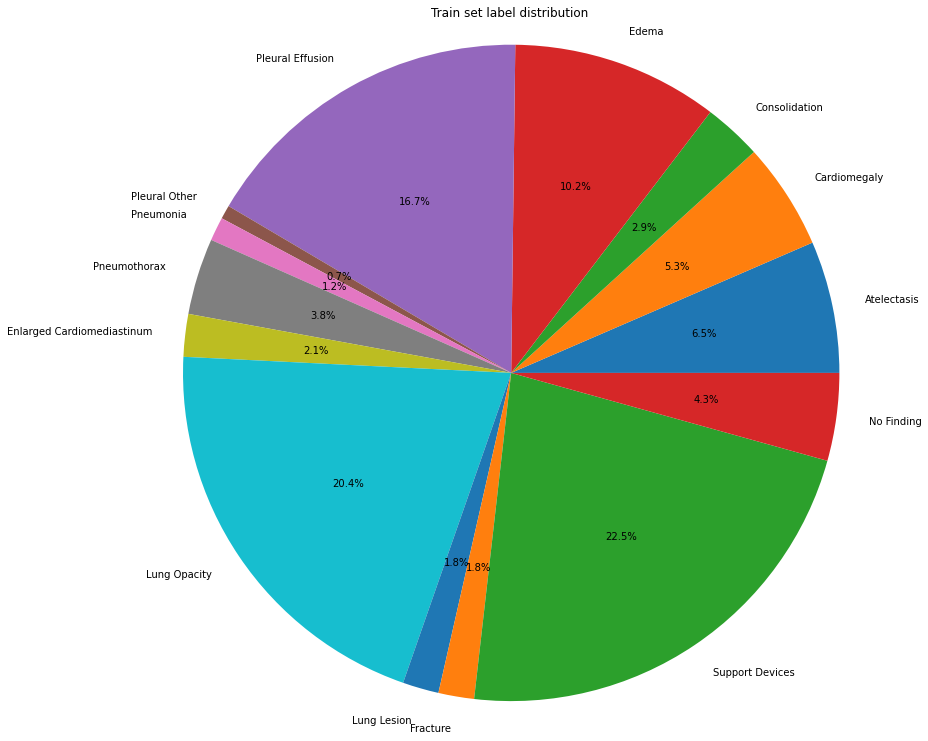

In [132]:
sizes = [
    train_df_Atelectasis_ratio,
    train_df_Cardiomegaly_ratio,
    train_df_Consolidation_ratio,
    train_df_Edema_ratio,
    train_df_Pleural_Effusion_ratio,
    train_df_Pleural_Other_ratio,
    train_df_Pneumonia_ratio,
    train_df_Pneumothorax_ratio,
    train_df_Enlarged_Cardiomediastinum_ratio,
    train_df_Lung_Opacity_ratio,
    train_df_Lung_Lesion_ratio,
    train_df_Fracture_ratio,
    train_df_Support_Devices_ratio,
    train_df_No_Finding_ratio
]

fig1, ax1 = plt.subplots(figsize=(13, 13))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Train set label distribution")

plt.show()

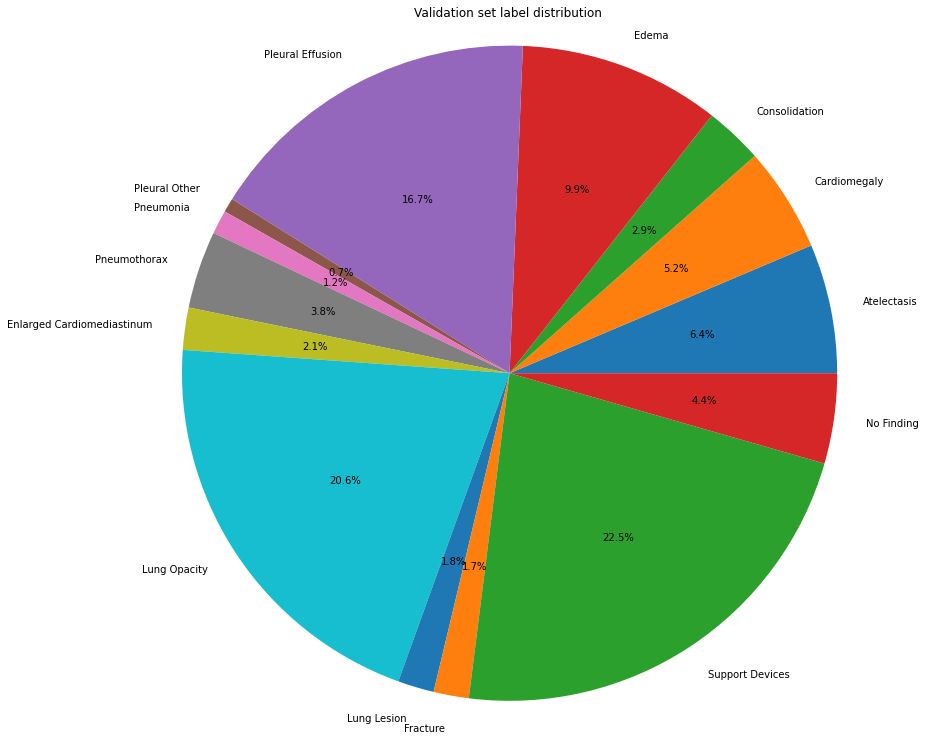

In [133]:
sizes = [
    validation_df_Atelectasis_ratio,
    validation_df_Cardiomegaly_ratio,
    validation_df_Consolidation_ratio,
    validation_df_Edema_ratio,
    validation_df_Pleural_Effusion_ratio,
    validation_df_Pleural_Other_ratio,
    validation_df_Pneumonia_ratio,
    validation_df_Pneumothorax_ratio,
    validation_df_Enlarged_Cardiomediastinum_ratio,
    validation_df_Lung_Opacity_ratio,
    validation_df_Lung_Lesion_ratio,
    validation_df_Fracture_ratio,
    validation_df_Support_Devices_ratio,
    validation_df_No_Finding_ratio
]

fig1, ax1 = plt.subplots(figsize=(13, 13))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Validation set label distribution")

plt.show()

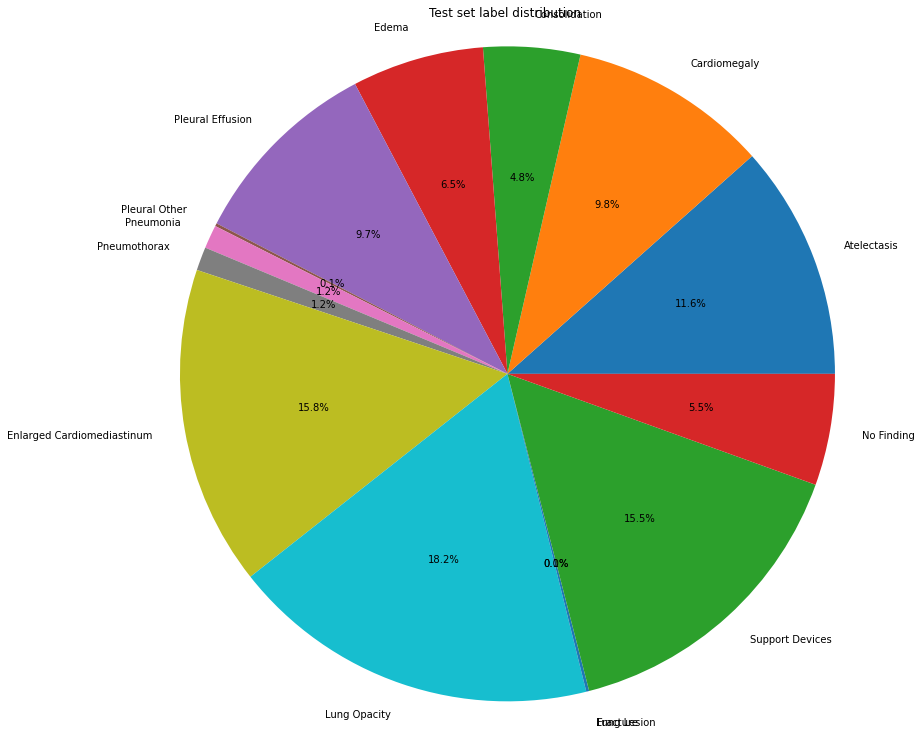

In [134]:
sizes = [
    test_df_Atelectasis_ratio,
    test_df_Cardiomegaly_ratio,
    test_df_Consolidation_ratio,
    test_df_Edema_ratio,
    test_df_Pleural_Effusion_ratio,
    test_df_Pleural_Other_ratio,
    test_df_Pneumonia_ratio,
    test_df_Pneumothorax_ratio,
    test_df_Enlarged_Cardiomediastinum_ratio,
    test_df_Lung_Opacity_ratio,
    test_df_Lung_Lesion_ratio,
    test_df_Fracture_ratio,
    test_df_Support_Devices_ratio,
    test_df_No_Finding_ratio
]

fig1, ax1 = plt.subplots(figsize=(13, 13))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Test set label distribution")

plt.show()

### 10- Saving processed labels

In [135]:
train_df

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Enlarged Cardiomediastinum,Lung Opacity,Lung Lesion,Fracture,Support Devices,No Finding
147955,CheXpert-v1.0/train/patient35203/study28/view1...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
163338,CheXpert-v1.0/train/patient38124/study5/view1_...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
69480,CheXpert-v1.0/train/patient16628/study1/view2_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25205,CheXpert-v1.0/train/patient06161/study2/view1_...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
98537,CheXpert-v1.0/train/patient23744/study17/view2...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62239,CheXpert-v1.0/train/patient15019/study1/view1_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152127,CheXpert-v1.0/train/patient35905/study3/view1_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
119174,CheXpert-v1.0/train/patient28559/study1/view3_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193608,CheXpert-v1.0/train/patient46927/study1/view1_...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [136]:
train_df.to_csv("../../labels/train_validation_split_data/train_u-zeroes.csv", index=False)

In [137]:
validation_df

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Enlarged Cardiomediastinum,Lung Opacity,Lung Lesion,Fracture,Support Devices,No Finding
67305,CheXpert-v1.0/train/patient16169/study2/view2_...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
158250,CheXpert-v1.0/train/patient37045/study7/view1_...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
51315,CheXpert-v1.0/train/patient12490/study12/view1...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
204270,CheXpert-v1.0/train/patient51556/study7/view1_...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
71280,CheXpert-v1.0/train/patient17091/study1/view1_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84611,CheXpert-v1.0/train/patient20333/study4/view1_...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
168690,CheXpert-v1.0/train/patient39344/study11/view1...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
166829,CheXpert-v1.0/train/patient38931/study1/view1_...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
184236,CheXpert-v1.0/train/patient43600/study1/view1_...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [138]:
validation_df.to_csv("../../labels/train_validation_split_data/validation_u-zeroes.csv", index=False)

In [139]:
test_df

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Enlarged Cardiomediastinum,Lung Opacity,Lung Lesion,Fracture,Support Devices,No Finding
0,CheXpert-v1.0/valid/patient64541/study1/view1_...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0/valid/patient64542/study1/view1_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,CheXpert-v1.0/valid/patient64542/study1/view2_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,CheXpert-v1.0/valid/patient64543/study1/view1_...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0/valid/patient64544/study1/view1_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,CheXpert-v1.0/valid/patient64736/study1/view1_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
230,CheXpert-v1.0/valid/patient64737/study1/view1_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
231,CheXpert-v1.0/valid/patient64738/study1/view1_...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
232,CheXpert-v1.0/valid/patient64739/study1/view1_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [140]:
test_df.to_csv("../../labels/train_validation_split_data/test_u-zeroes.csv", index=False)

### 11- Saving only the CheXpert competition 5 labels

In [141]:
chexpert_labels = [
    "Path",
    "Atelectasis",
    "Cardiomegaly",
    "Consolidation",
    "Edema",
    "Pleural Effusion"
]

In [142]:
train_df_chexpert = train_df[chexpert_labels]

In [143]:
train_df_chexpert

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion
147955,CheXpert-v1.0/train/patient35203/study28/view1...,0.0,0.0,0.0,0.0,1.0
163338,CheXpert-v1.0/train/patient38124/study5/view1_...,0.0,0.0,0.0,0.0,1.0
69480,CheXpert-v1.0/train/patient16628/study1/view2_...,0.0,0.0,0.0,0.0,0.0
25205,CheXpert-v1.0/train/patient06161/study2/view1_...,0.0,1.0,0.0,0.0,0.0
98537,CheXpert-v1.0/train/patient23744/study17/view2...,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...
62239,CheXpert-v1.0/train/patient15019/study1/view1_...,0.0,0.0,0.0,0.0,0.0
152127,CheXpert-v1.0/train/patient35905/study3/view1_...,0.0,0.0,0.0,0.0,0.0
119174,CheXpert-v1.0/train/patient28559/study1/view3_...,0.0,0.0,0.0,0.0,0.0
193608,CheXpert-v1.0/train/patient46927/study1/view1_...,0.0,0.0,0.0,1.0,0.0


In [144]:
validation_df_chexpert = validation_df[chexpert_labels]

In [145]:
validation_df_chexpert

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion
67305,CheXpert-v1.0/train/patient16169/study2/view2_...,0.0,0.0,0.0,1.0,1.0
158250,CheXpert-v1.0/train/patient37045/study7/view1_...,0.0,0.0,0.0,0.0,1.0
51315,CheXpert-v1.0/train/patient12490/study12/view1...,0.0,0.0,0.0,0.0,1.0
204270,CheXpert-v1.0/train/patient51556/study7/view1_...,0.0,0.0,0.0,0.0,1.0
71280,CheXpert-v1.0/train/patient17091/study1/view1_...,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
84611,CheXpert-v1.0/train/patient20333/study4/view1_...,0.0,0.0,0.0,0.0,1.0
168690,CheXpert-v1.0/train/patient39344/study11/view1...,0.0,0.0,0.0,0.0,1.0
166829,CheXpert-v1.0/train/patient38931/study1/view1_...,0.0,1.0,0.0,0.0,1.0
184236,CheXpert-v1.0/train/patient43600/study1/view1_...,1.0,0.0,0.0,0.0,0.0


In [146]:
test_df_chexpert = test_df[chexpert_labels]

In [147]:
test_df_chexpert

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion
0,CheXpert-v1.0/valid/patient64541/study1/view1_...,0.0,1.0,0.0,0.0,0.0
1,CheXpert-v1.0/valid/patient64542/study1/view1_...,0.0,0.0,0.0,0.0,0.0
2,CheXpert-v1.0/valid/patient64542/study1/view2_...,0.0,0.0,0.0,0.0,0.0
3,CheXpert-v1.0/valid/patient64543/study1/view1_...,0.0,0.0,0.0,1.0,0.0
4,CheXpert-v1.0/valid/patient64544/study1/view1_...,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
229,CheXpert-v1.0/valid/patient64736/study1/view1_...,0.0,0.0,0.0,0.0,0.0
230,CheXpert-v1.0/valid/patient64737/study1/view1_...,0.0,0.0,0.0,0.0,0.0
231,CheXpert-v1.0/valid/patient64738/study1/view1_...,0.0,1.0,0.0,1.0,0.0
232,CheXpert-v1.0/valid/patient64739/study1/view1_...,0.0,0.0,0.0,0.0,0.0


### 12- Distribution of CheXpert labels pie charts

#### 12.1 Atelectasis

In [148]:
train_df_chexpert["Atelectasis"].sum()

26795.0

In [149]:
train_df_chexpert_Atelectasis_ratio = train_df_chexpert["Atelectasis"].sum() / len(train_df_chexpert)
train_df_chexpert_Atelectasis_ratio

0.14991803324549183

In [150]:
validation_df_chexpert["Atelectasis"].sum()

6581.0

In [151]:
validation_df_chexpert_Atelectasis_ratio = validation_df_chexpert["Atelectasis"].sum() / len(validation_df_chexpert)
validation_df_chexpert_Atelectasis_ratio

0.14728196405791913

In [152]:
test_df_chexpert["Atelectasis"].sum()

80.0

In [153]:
test_df_chexpert_Atelectasis_ratio = test_df_chexpert["Atelectasis"].sum() / len(test_df_chexpert)
test_df_chexpert_Atelectasis_ratio

0.3418803418803419

#### 12.2 Cardiomegaly

In [154]:
train_df_chexpert["Cardiomegaly"].sum()

21671.0

In [155]:
train_df_chexpert_Cardiomegaly_ratio = train_df_chexpert["Cardiomegaly"].sum() / len(train_df_chexpert)
train_df_chexpert_Cardiomegaly_ratio

0.12124925166870884

In [156]:
validation_df_chexpert["Cardiomegaly"].sum()

5329.0

In [157]:
validation_df_chexpert_Cardiomegaly_ratio = validation_df_chexpert["Cardiomegaly"].sum() / len(validation_df_chexpert)
validation_df_chexpert_Cardiomegaly_ratio

0.11926235928652955

In [158]:
test_df_chexpert["Cardiomegaly"].sum()

68.0

In [159]:
test_df_chexpert_Cardiomegaly_ratio = test_df_chexpert["Cardiomegaly"].sum() / len(test_df_chexpert)
test_df_chexpert_Cardiomegaly_ratio

0.2905982905982906

#### 12.3 Consolidation

In [160]:
train_df_chexpert["Consolidation"].sum()

11825.0

In [161]:
train_df_chexpert_Consolidation_ratio = train_df_chexpert["Consolidation"].sum() / len(train_df_chexpert)
train_df_chexpert_Consolidation_ratio

0.06616087863884833

In [162]:
validation_df_chexpert["Consolidation"].sum()

2958.0

In [163]:
validation_df_chexpert_Consolidation_ratio = validation_df_chexpert["Consolidation"].sum() / len(validation_df_chexpert)
validation_df_chexpert_Consolidation_ratio

0.06619967325381017

In [164]:
test_df_chexpert["Consolidation"].sum()

33.0

In [165]:
test_df_chexpert_Consolidation_ratio = test_df_chexpert["Consolidation"].sum() / len(test_df_chexpert)
test_df_chexpert_Consolidation_ratio

0.14102564102564102

#### 12.4 Edema

In [166]:
train_df_chexpert["Edema"].sum()

41987.0

In [167]:
train_df_chexpert_Edema_ratio = train_df_chexpert["Edema"].sum() / len(train_df_chexpert)
train_df_chexpert_Edema_ratio

0.23491727792045028

In [168]:
validation_df_chexpert["Edema"].sum()

10259.0

In [169]:
validation_df_chexpert_Edema_ratio = validation_df_chexpert["Edema"].sum() / len(validation_df_chexpert)
validation_df_chexpert_Edema_ratio

0.22959514804287984

In [170]:
test_df_chexpert["Edema"].sum()

45.0

In [171]:
test_df_chexpert_Edema_ratio = test_df_chexpert["Edema"].sum() / len(test_df_chexpert)
test_df_chexpert_Edema_ratio

0.19230769230769232

#### 12.5 Pleural Effusion

In [172]:
train_df_chexpert["Pleural Effusion"].sum()

68928.0

In [173]:
train_df_chexpert_Pleural_Effusion_ratio = train_df_chexpert["Pleural Effusion"].sum() / len(train_df_chexpert)
train_df_chexpert_Pleural_Effusion_ratio

0.38565218121086997

In [174]:
validation_df_chexpert["Pleural Effusion"].sum()

17259.0

In [175]:
validation_df_chexpert_Pleural_Effusion_ratio = validation_df_chexpert["Pleural Effusion"].sum() / len(validation_df_chexpert)
validation_df_chexpert_Pleural_Effusion_ratio

0.386254280151288

In [176]:
test_df_chexpert["Pleural Effusion"].sum()

67.0

In [177]:
test_df_chexpert_Pleural_Effusion_ratio = test_df_chexpert["Pleural Effusion"].sum() / len(test_df_chexpert)
test_df_chexpert_Pleural_Effusion_ratio

0.2863247863247863

#### 12.6 pie chart

In [178]:
labels = [
    "Atelectasis",
    "Cardiomegaly",
    "Consolidation",
    "Edema",
    "Pleural Effusion"
]

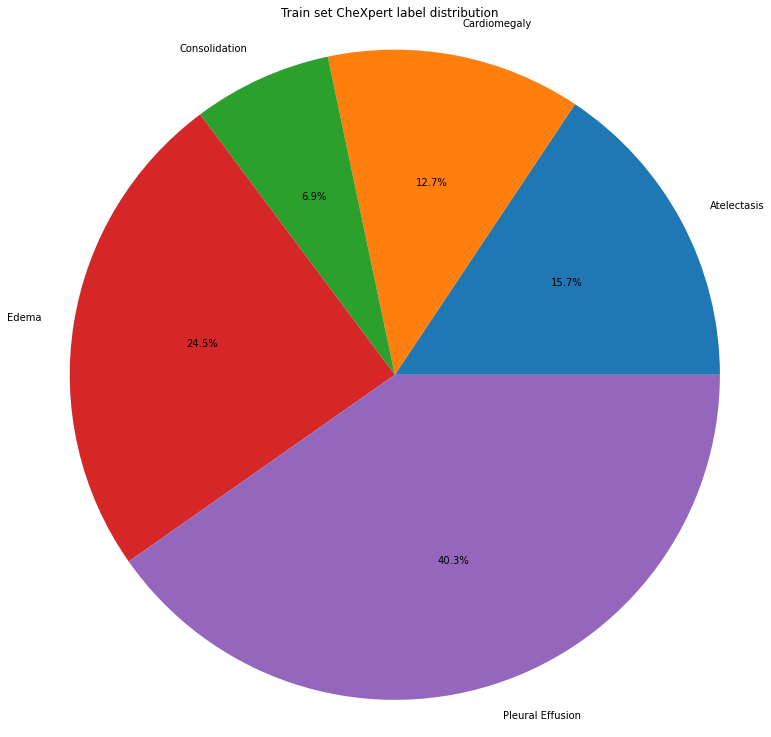

In [179]:
sizes = [
    train_df_chexpert_Atelectasis_ratio,
    train_df_chexpert_Cardiomegaly_ratio,
    train_df_chexpert_Consolidation_ratio,
    train_df_chexpert_Edema_ratio,
    train_df_chexpert_Pleural_Effusion_ratio
]

fig1, ax1 = plt.subplots(figsize=(13, 13))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', normalize=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Train set CheXpert label distribution")

plt.show()

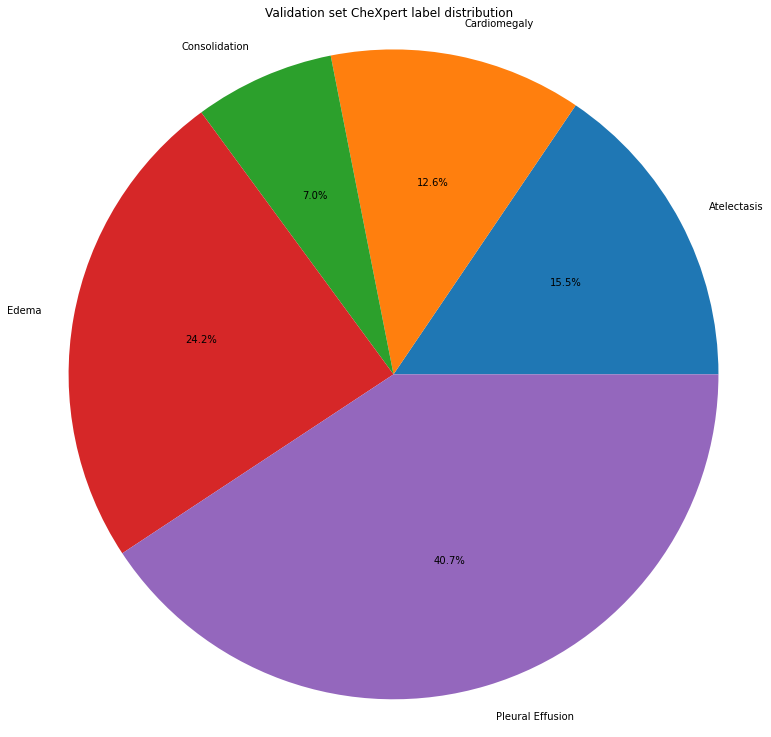

In [180]:
sizes = [
    validation_df_chexpert_Atelectasis_ratio,
    validation_df_chexpert_Cardiomegaly_ratio,
    validation_df_chexpert_Consolidation_ratio,
    validation_df_chexpert_Edema_ratio,
    validation_df_chexpert_Pleural_Effusion_ratio
]

fig1, ax1 = plt.subplots(figsize=(13, 13))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', normalize=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Validation set CheXpert label distribution")

plt.show()

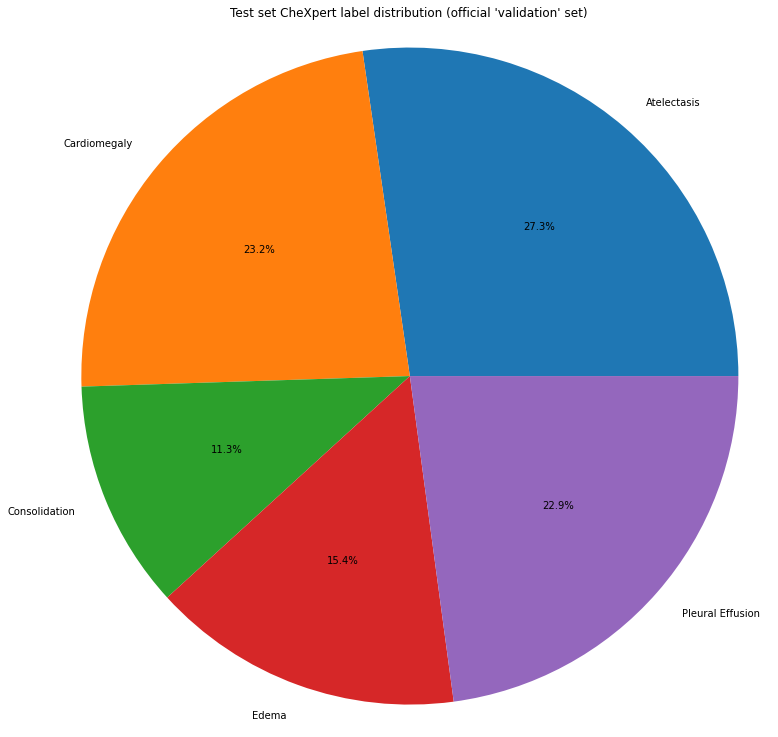

In [181]:
sizes = [
    test_df_chexpert_Atelectasis_ratio,
    test_df_chexpert_Cardiomegaly_ratio,
    test_df_chexpert_Consolidation_ratio,
    test_df_chexpert_Edema_ratio,
    test_df_chexpert_Pleural_Effusion_ratio
]

fig1, ax1 = plt.subplots(figsize=(13, 13))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Test set CheXpert label distribution (official 'validation' set)")

plt.show()

### 13- Saving CheXpert labels only version of the labels

In [182]:
train_df_chexpert.to_csv("../../labels/train_validation_split_data/train_u-zeroes_chexpert.csv", index=False)

In [183]:
validation_df_chexpert.to_csv("../../labels/train_validation_split_data/validation_u-zeroes_chexpert.csv", index=False)

In [184]:
test_df_chexpert.to_csv("../../labels/train_validation_split_data/test_u-zeroes_chexpert.csv", index=False)